Gnuplot Kernel
==============

All code cells are interpreted as statements to gnuplot unless 
cell magic is being used. Similarly, every line is a statement to
gnuplot unless it is a line magic. We will see what all that
means.

First off, a plot and a plain calculation.

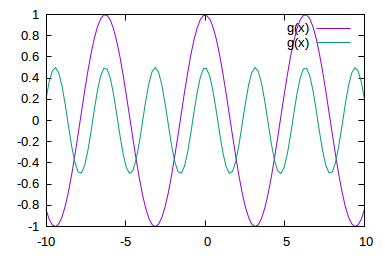

In [1]:
g(x) = cos(a*x)/a
plot a=1, g(x), \
     a=2, g(x)

In [2]:
print sin(42)

-0.916521547915634


By default all plots are inline, that means they show up in the notebook.
To change this default behaviour we use the `gnuplot` line magic.

For example

In [3]:
%gnuplot qt size 600,400

That sets the terminal to `qt` and the plots will not appear inline.

In [4]:
plot cos(x)

That opened a `qt` window for the plot and every plot there after will be
displayed the same way. That is, until we use the `gnuplot` line magic
to change to inline or even another terminal like `X11`.

Let us go for inline.

In [5]:
%gnuplot inline

In [6]:
%gnuplot inline jpeg enhanced background rgb "#F5DA81"

Other than `%gnuplot inline` the rest of the line
is as you write for `set terminal`.

From the gnuplot documentation,
the syntax for `jpeg` terminal is:

```
set terminal jpeg 
      {{no}enhanced}
      {{no}interlace}
      {linewidth <lw>} {dashlength <dl>} {rounded|butt}
      {tiny | small | medium | large | giant}
      {font "<face> {,<pointsize>}"} {fontscale <scale>}
      {size <x>,<y>} {{no}crop}
      {background <rgb_color>}
```

We just get rid of `set terminal`. If it is inline it has to be one
of `cairopng`, `jpeg`, `svg` or `png`. Get the hang of it!

Let's plot something

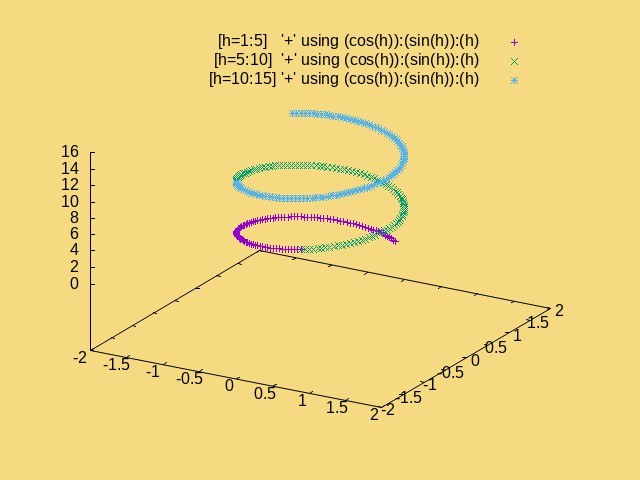

In [7]:
splot [-2:2][-2:2] sample \
   [h=1:5]   '+' using (cos(h)):(sin(h)):(h), \
   [h=5:10]  '+' using (cos(h)):(sin(h)):(h), \
   [h=10:15] '+' using (cos(h)):(sin(h)):(h)

That is a `jpeg`, not the best quality. So lets reset back to `png` format.

In [8]:
%gnuplot inline

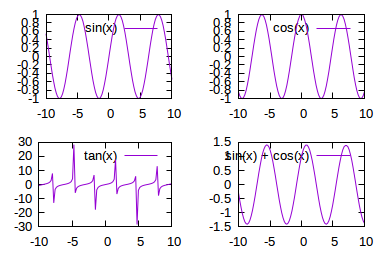

In [9]:
set multiplot layout 2,2
plot sin(x)
plot cos(x)
plot tan(x)
plot sin(x) + cos(x)
unset multiplot

When plotting inline, you can also have multiple plots in the same code cell.
Here are the four plot from above.

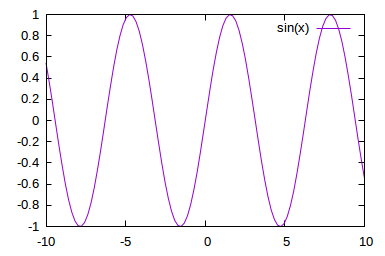

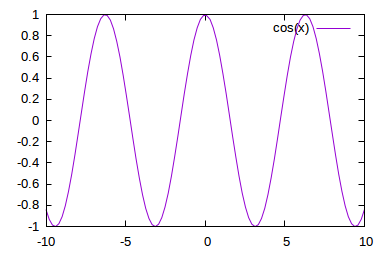

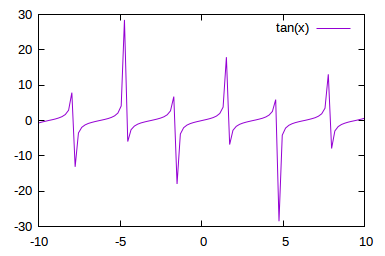

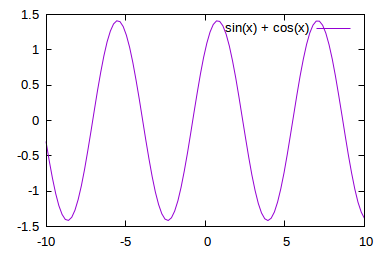

In [10]:
plot sin(x)
plot cos(x)
plot tan(x)
plot sin(x) + cos(x)

Note, there are 4 separate plots, it is not a multiplot.
This is a feature of the `gnuplot_kernel`.

Another feature that may be useful it is the `reset` magic.
You can declare statements that will run after every cell
computation

In [11]:
%%reset
set key
set xlabel 'x axis'
set ylabel 'y axis'

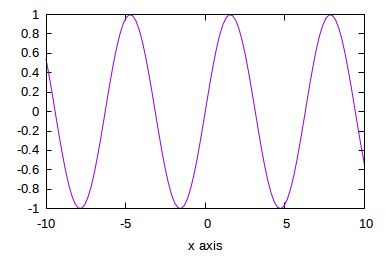

In [12]:
unset key
unset ylabel
plot sin(x)

Then we plot again

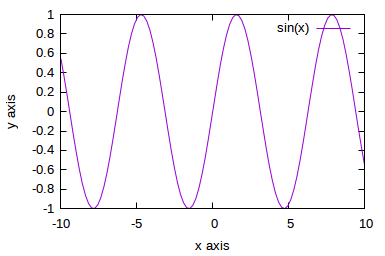

In [13]:
plot sin(x)

Use the `%%reset` magic to set global features that you may change
in some cells. If you choose to put **a** plot statement in there it plot
after every cell execution.

To remove the reset, you the `%reset` inline magic.

In [14]:
%reset

Note that gnuplot will still remember the last statements until you specifically undo each
one of them, or a full reset.

```
unset key
unset xlabel
unset ylabel

# OR
reset
```

Hint: To have every cell execute independent of the options set in the other
cells, put the `reset` statement in the `%%reset` magic.

```
%%reset
reset
```

Finally a plot from the official documentation, notice the inline magic at the top.

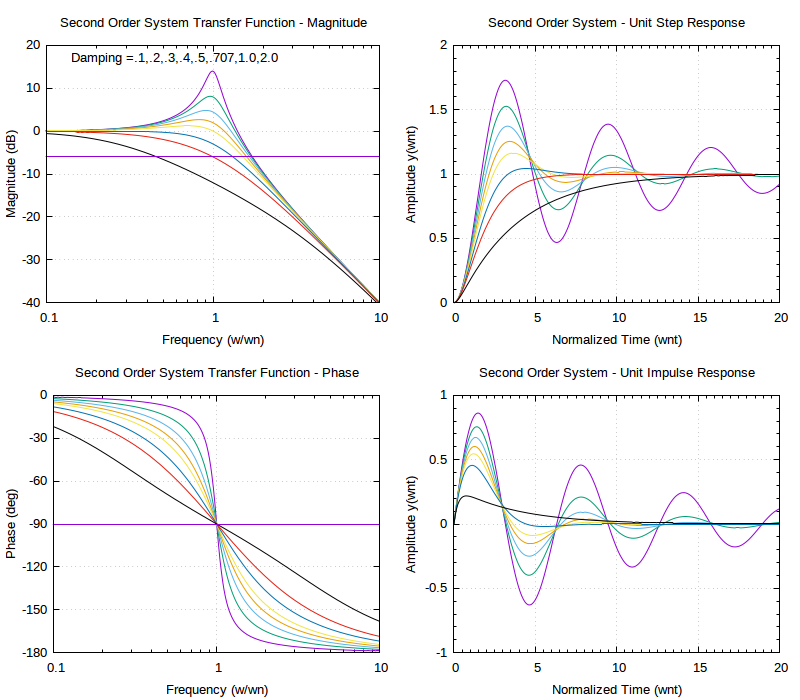

In [15]:
%gnuplot inline pngcairo font "Arial,10" size 800,700

set style function lines
set size 1.0, 1.0
set origin 0.0, 0.0
set multiplot
set size 0.5,0.5
set origin 0.0,0.5
set grid
unset key
set angles radians
set samples 250
#  Plot Magnitude Response
set title "Second Order System Transfer Function - Magnitude"
mag(w) = -10*log10( (1-w**2)**2 + 4*(zeta*w)**2)
set dummy w
set logscale x
set xlabel "Frequency (w/wn)"
set ylabel "Magnitude (dB)" offset 1,0
set label 1 "Damping =.1,.2,.3,.4,.5,.707,1.0,2.0" at .14,17
set xrange [.1:10]
set yrange [-40:20]
plot \
  zeta=.1,mag(w), \
  zeta=.2,mag(w), \
  zeta=.3,mag(w), \
  zeta=.4,mag(w), \
  zeta=.5,mag(w), \
  zeta=.707,mag(w), \
  zeta=1.0,mag(w), \
  zeta=2.0,mag(w),-6
#  Plot Phase Response
set size 0.5,0.5
set origin 0.0,0.0
set title "Second Order System Transfer Function - Phase"
set label 1 ""
set ylabel "Phase (deg)" offset 1,0
set ytics -180, 30, 0 
set yrange [-180:0]
tmp(w) = (-180/pi)*atan( 2*zeta*w/(1-w**2) )
# Fix for atan function wrap problem
tmp1(w)= w<1?tmp(w):(tmp(w)-180)
phi(w)=zeta==1?(-2*(180/pi)*atan(w)):tmp1(w)
plot \
  zeta=.1,phi(w), \
  zeta=.2,phi(w), \
  zeta=.3,phi(w), \
  zeta=.4,phi(w), \
  zeta=.5,phi(w), \
  zeta=.707,phi(w), \
  zeta=1,phi(w), \
  zeta=2.0,phi(w), \
  -90
#  Plot Step Response
set size 0.5,0.5
set origin 0.5,0.5
set dummy wnt
unset logscale x
set title "Second Order System - Unit Step Response"
set ylabel "Amplitude y(wnt)" offset 1,0 
set xlabel "Normalized Time (wnt)"
set xrange [0:20]
set xtics 0,5,20
set yrange [0:2.0]
set ytics 0, .5, 2.0
set mytics 5
set mxtics 10
wdwn(zeta)=sqrt(1-zeta**2)
shift(zeta) = atan(wdwn(zeta)/zeta)
alpha(zeta)=zeta>1?sqrt(zeta**2-1.0):0
tau1(zeta)=1/(zeta-alpha(zeta))
tau2(zeta)=1/(zeta+alpha(zeta))
c1(zeta)=(zeta + alpha(zeta))/(2*alpha(zeta))
c2(zeta)=c1(zeta)-1
y1(wnt)=zeta==1?1 - exp(-wnt)*(wnt + 1):0
y2(wnt)=zeta<1?(1 - (exp(-zeta*wnt)/wdwn(zeta))*sin(wdwn(zeta)*wnt + shift(zeta))):y1(wnt)
y(wnt)=zeta>1?1-c1(zeta)*exp(-wnt/tau1(zeta))+c2(zeta)*exp(-wnt/tau2(zeta)):y2(wnt)
plot \
  zeta=.1,y(wnt), \
  zeta=.2,y(wnt), \
  zeta=.3,y(wnt), \
  zeta=.4,y(wnt), \
  zeta=.5,y(wnt), \
  zeta=.707,y(wnt), \
  zeta=1,y(wnt), \
  zeta=2,y(wnt)
#
#  Plot Impulse Response
set origin .5,0.
set title "Second Order System - Unit Impulse Response"
y(wnt)=exp(-zeta*wnt) * sin(wdwn(zeta)*wnt) / wdwn(zeta)
set yrange [-1. :1.]
set ytics -1,.5,1.
plot \
  zeta=.1,y(wnt), \
  zeta=.2,y(wnt), \
  zeta=.3,y(wnt), \
  zeta=.4,y(wnt), \
  zeta=.5,y(wnt), \
  zeta=.707,y(wnt), \
  zeta=1,y(wnt), \
  zeta=2,y(wnt)
unset multiplot

`gnuplot_kernel` as an extension
--------------------------------

When using another kernel, e.g a python, R, Julia, ...,
you can load `gnuplot_kernel` as an extension and it
will make available the `%gnuplot` line magic and
a `%%gnuplot` cell magic. See the 
[gnuplot-magic notebook](gnuplot-magic.ipynb)
for a demonstration.

** A little more stuff **

See the help menu for a whole set magics from `meta_kernel` that are available to you when
using the `gnuplot_kernel`. Check out the `%%file` magic provided by `meta_kernel`.

In [16]:
%%file /tmp/tictactoe.txt
## Lines
# horizontal lines
0   1
3   1

0   2
3   2

# vertical lines
1   0
1   3

2   0
2   3


## Points
# crosses
.5  2.5
2.5 .5
.5  1.5
.5  .5


# circles
2.5 2.5
1.5  1.5
1.5  0.5


# correct answer crossout
.5  .1
.5  2.9

Created file '/tmp/tictactoe.txt'.


In [17]:
%gnuplot inline pngcairo enhanced transparent size 200,200 rounded crop
reset

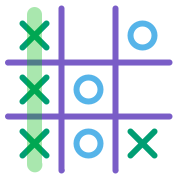

In [18]:
unset key
unset xtics
unset ytics
unset border
set size square
plot '/tmp/tictactoe.txt' index 0 with lines lw 6 lc rgb '#7A5DC7', \
     '' index 1 with points ps 4 lw 6, \
     '' index 2 with points ps 4 pt 6 lw 6, \
     '' index 3 with lines lw 15 lc '#AA00BB11'
unset arrow

Game Over